In [37]:
import os
import keras
import cv2
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.layers import Activation, Dense
from keras. layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras_preprocessing import image
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip -uq "/content/drive/My Drive/val.zip" -d "/content/drive/My Drive/val_unzipped"


In [7]:
!unzip -uq "/content/drive/My Drive/train.zip" -d "/content/drive/My Drive/train_unzipped"


In [4]:
train_data_path = "/content/drive/MyDrive/train_unzipped/train"
validation_data_path = "/content/drive/MyDrive/val_unzipped/val"

In [5]:
path = "/content/drive/MyDrive/train_unzipped/train/"
for i in os.listdir(path):
    print(str(len(os.listdir(path+i))) +" "+ i)


815 diseased cotton plant
288 diseased cotton leaf
427 fresh cotton leaf
421 fresh cotton plant


(694, 694, 3)


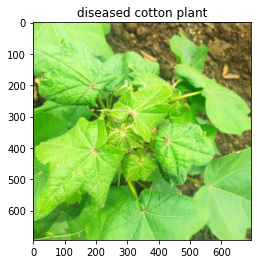

(694, 694, 3)


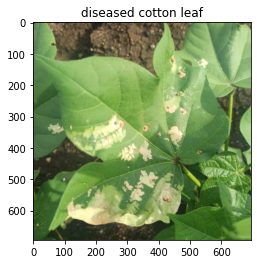

(694, 694, 3)


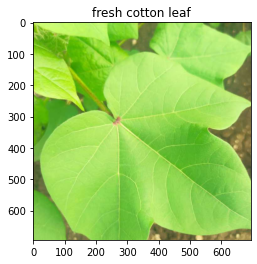

(924, 520, 3)


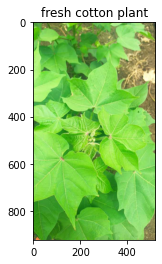

In [6]:
from matplotlib.pyplot import imshow, show

def show_img(path):
  for i in os.listdir(path):
    each_cat_imgs = os.listdir(path+i)
    each_cat_img = str(each_cat_imgs[0])
    each_img_path = str(path+i+'/'+each_cat_img)
    img = cv2.imread(each_img_path)
    print(img.shape)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(i)
    show()

    #function call 
show_img("/content/drive/MyDrive/train_unzipped/train/")

In [7]:
train_generator = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)
train_data =  train_generator.flow_from_directory(directory = train_data_path,target_size=(224, 224), batch_size=32)

Found 1951 images belonging to 4 classes.


In [8]:
validation_generator = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)
validation_data =  train_generator.flow_from_directory(directory = validation_data_path,target_size=(224, 224), batch_size=32)

Found 324 images belonging to 4 classes.


In [9]:
img, labels = next(train_data)
print(img[0], labels[0])

[[[ 2.9060997e+01  8.1221001e+01  1.0232000e+02]
  [ 1.8060997e+01  6.8221001e+01  8.9320000e+01]
  [ 6.0997009e-02  4.5221001e+01  6.7320000e+01]
  ...
  [-2.1939003e+01  2.0221001e+01  4.0320000e+01]
  [-6.9390030e+00  3.3221001e+01  4.7320000e+01]
  [-1.5939003e+01  2.4221001e+01  3.8320000e+01]]

 [[ 5.0609970e+00  5.7221001e+01  7.8320000e+01]
  [-4.9390030e+00  4.5221001e+01  6.6320000e+01]
  [ 3.0609970e+00  4.8221001e+01  7.0320000e+01]
  ...
  [-1.3939003e+01  3.7221001e+01  5.4320000e+01]
  [ 6.0609970e+00  4.6221001e+01  6.0320000e+01]
  [ 6.0997009e-02  4.0221001e+01  5.4320000e+01]]

 [[-2.9390030e+00  4.9221001e+01  7.0320000e+01]
  [-4.9390030e+00  4.5221001e+01  6.6320000e+01]
  [-4.9390030e+00  4.0221001e+01  6.2320000e+01]
  ...
  [ 4.0609970e+00  5.9221001e+01  7.1320000e+01]
  [ 2.0609970e+00  4.2221001e+01  5.6320000e+01]
  [-1.9390030e+00  3.8221001e+01  5.2320000e+01]]

 ...

 [[-4.5939003e+01  8.1221001e+01  1.5320000e+01]
  [-3.3939003e+01  1.0222100e+02  3.232

In [34]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [11]:
from keras.applications.vgg16 import VGG16
vgg_model = VGG16(weights='imagenet')
print(vgg_model.summary())

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [12]:
model = keras.Sequential()
for layer in vgg_model.layers[:-3]:
  model.add(layer)
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [13]:
for layer in model.layers:
  layer.trainable = False

In [14]:
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=4, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [15]:
model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_data, 
                          epochs=10, 
                          verbose=1, 
                          validation_data= validation_data)
                          

Epoch 1/10
61/61 [==============================] - 637s 10s/step - loss: 2.9026 - accuracy: 0.4859 - val_loss: 0.4936 - val_accuracy: 0.8241
Epoch 2/10
61/61 [==============================] - 20s 333ms/step - loss: 0.6084 - accuracy: 0.7924 - val_loss: 0.4091 - val_accuracy: 0.8704
Epoch 3/10
61/61 [==============================] - 20s 329ms/step - loss: 0.3816 - accuracy: 0.8630 - val_loss: 0.3123 - val_accuracy: 0.8920
Epoch 4/10
61/61 [==============================] - 20s 330ms/step - loss: 0.2546 - accuracy: 0.9046 - val_loss: 0.2903 - val_accuracy: 0.8858
Epoch 5/10
61/61 [==============================] - 20s 321ms/step - loss: 0.2322 - accuracy: 0.9178 - val_loss: 0.2553 - val_accuracy: 0.9012
Epoch 6/10
61/61 [==============================] - 20s 326ms/step - loss: 0.1418 - accuracy: 0.9483 - val_loss: 0.2341 - val_accuracy: 0.9105
Epoch 7/10
61/61 [==============================] - 20s 325ms/step - loss: 0.1152 - accuracy: 0.9580 - val_loss: 0.2513 - val_accuracy: 0.9198


In [17]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(0,len(train_loss))

Text(0.5, 1.0, 'Model loss')

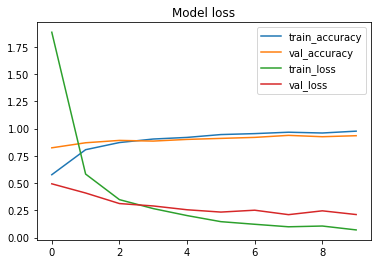

In [18]:
plt.plot(epochs,train_accuracy,label='train_accuracy')
plt.plot(epochs,val_accuracy,label='val_accuracy')
plt.legend()
plt.title("Model accuracy")

plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.legend()
plt.title("Model loss")

In [44]:
test_data.class_indices
class_dict = train_data.class_indices

In [56]:

def prediction(path):
  test_image = image.load_img(path, target_size=(224, 224))    
  test_image_arr = image.img_to_array(test_image)
  test_image_arr = tf.image.rgb_to_hsv(test_image_arr)
  test_image_arr = np.expand_dims(test_image_arr, axis=0)
  test_image_arr = test_image_arr/255.0
  plt.imshow(test_image)
  pred_array = model.predict(test_image_arr)
  print(pred_array)
  pred_class = np.argmax(pred_array)
  print("predicted class:", pred_class)
  for key, value in class_dict.items():
    if pred_class == value:
      print(key)

[[0.64424497 0.05890664 0.20587745 0.09097087]]
predicted class: 0
diseased cotton leaf


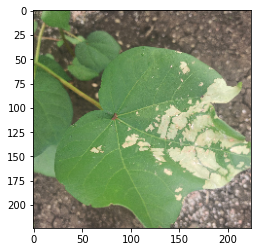

In [57]:
prediction("/content/drive/MyDrive/test_unzipped/test/diseased cotton leaf/dis_leaf (124).jpg")